In [64]:
import pandas as pd
import io
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt #to allow subplot creation
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

import plotly.figure_factory as ff
import plotly.graph_objects as go
from tabulate import tabulate

from sklearn import tree # Import Tree Classifiers
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifiers
from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn.preprocessing import StandardScaler
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint # Generate random numbers

In [3]:
!pip install opendatasets

  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77733 sha256=b00df7eda3ef5906196fd868645ed59f4ce480ddc994e44767fba5425fa826ab
  Stored in directory: c:\users\anton\appdata\local\pip\cache\wheels\9c\45\15\6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle


In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=application_record.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  rubenav


Your Kaggle Key:

  ································


100%|██████████| 5.32M/5.32M [00:00<00:00, 30.9MB/s]

In [6]:
od.download("https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction?select=credit_record.csv")

Skipping, found downloaded files in ".\credit-card-approval-prediction" (use force=True to force download)


In [7]:
df1 = pd.read_csv("credit-card-approval-prediction/application_record.csv")
df2 = pd.read_csv("credit-card-approval-prediction/credit_record.csv")

In [8]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [9]:
df2.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [10]:
df1.count()

ID                     438557
CODE_GENDER            438557
FLAG_OWN_CAR           438557
FLAG_OWN_REALTY        438557
CNT_CHILDREN           438557
AMT_INCOME_TOTAL       438557
NAME_INCOME_TYPE       438557
NAME_EDUCATION_TYPE    438557
NAME_FAMILY_STATUS     438557
NAME_HOUSING_TYPE      438557
DAYS_BIRTH             438557
DAYS_EMPLOYED          438557
FLAG_MOBIL             438557
FLAG_WORK_PHONE        438557
FLAG_PHONE             438557
FLAG_EMAIL             438557
OCCUPATION_TYPE        304354
CNT_FAM_MEMBERS        438557
dtype: int64

<AxesSubplot:ylabel='Frequency'>

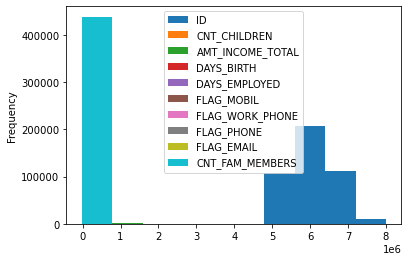

In [11]:
df1.plot.hist()

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [13]:
null_count = df1.isnull().sum().reset_index(name = "null count")
unique_valuecount = df1.nunique().reset_index(name = "unique value count")
datatypes = df1.dtypes.reset_index(name="types")
pd.set_option('display.max_rows', 500)
pd.concat([null_count, unique_valuecount , datatypes], axis=1).T.drop_duplicates().T

,index,null count,unique value count,types
0,ID,0,438510,int64
1,CODE_GENDER,0,2,object
2,FLAG_OWN_CAR,0,2,object
3,FLAG_OWN_REALTY,0,2,object
4,CNT_CHILDREN,0,12,int64
5,AMT_INCOME_TOTAL,0,866,float64
6,NAME_INCOME_TYPE,0,5,object
7,NAME_EDUCATION_TYPE,0,5,object
8,NAME_FAMILY_STATUS,0,5,object
9,NAME_HOUSING_TYPE,0,6,object


In [14]:
plt.rcParams['figure.facecolor'] = 'white'

In [15]:
apprecprocess=df1.copy()
credrecprocess=df2.copy()

In [16]:
apprecprocess['ID'].nunique()

438510

the total rows are 438,557. This means it has duplicates

In [17]:
apprecprocess = apprecprocess.drop_duplicates('ID', keep='last') 
# we identified that there are some duplicates in this dataset
# we will be deleting those duplicates and will keep the last entry of the ID if its repeated.

In [18]:
credrecprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [19]:
credrecprocess['ID'].nunique() 

45985

this has around 46,000 unique rows as there are repeating entries for different monthly values and status.

In [20]:
# checking to see how many records match in two datasets
len(set(credrecprocess['ID']).intersection(set(apprecprocess['ID']))) 

36457

In [21]:
# find all users' account open month.
begin_month=pd.DataFrame(credrecprocess.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
appcredmergedata=pd.merge(apprecprocess,begin_month,how="left",on="ID") #merge to record data
appcredmergedata.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0


In [22]:
credrecprocess['STATUS'].nunique() 

8

As per the data dictionary, following values are expected in status columns : 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [23]:
#Creating a new column and considering all candidates with overdue as more than 90 days as possible risk
credrecprocess['targetrisk'] = None
credrecprocess['targetrisk'][credrecprocess['STATUS'] =='3']='Yes' 
credrecprocess['targetrisk'][credrecprocess['STATUS'] =='4']='Yes' 
credrecprocess['targetrisk'][credrecprocess['STATUS'] =='5']='Yes'
credrecprocess.head()

,ID,MONTHS_BALANCE,STATUS,targetrisk
0,5001711,0,X,None
1,5001711,-1,0,None
2,5001711,-2,0,None
3,5001711,-3,0,None
4,5001712,0,C,None


In [24]:
credrecprocess1=credrecprocess.groupby('ID').count()
credrecprocess1['targetrisk'][credrecprocess1['targetrisk'] > 0]='Yes' 
credrecprocess1['targetrisk'][credrecprocess1['targetrisk'] == 0]='No' 
credrecprocess1 = credrecprocess1[['targetrisk']]
credrecprocess1.head(3)

,targetrisk
ID,
5001711,No
5001712,No
5001713,No


In [25]:
# Merge  status with the main record dataframe where targetrisk = yes will get converted to 1 and No as 0 to avoid label encoding in future.
appcredmergedata=pd.merge(appcredmergedata,credrecprocess1,how='inner',on='ID')
appcredmergedata['targetrisk']=appcredmergedata['targetrisk']
appcredmergedata.loc[appcredmergedata['targetrisk']=='Yes','targetrisk']=1
appcredmergedata.loc[appcredmergedata['targetrisk']=='No','targetrisk']=0

In [26]:
appcredmergedata.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,targetrisk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0


In [27]:
print(appcredmergedata['targetrisk'].value_counts())
appcredmergedata['targetrisk'].value_counts(normalize=True)

0    36155
1      302
Name: targetrisk, dtype: int64


0    0.991716
1    0.008284
Name: targetrisk, dtype: float64

only records are at risk , which is low though it is also important to understand the factors affecting it and this can be associated with high numbers in terms of amount as well 

## Feature Engineering

In [28]:
dfprocess=appcredmergedata.copy()

In [29]:
dfprocess.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'OwnCar','FLAG_OWN_REALTY':'OwnReality',
                         'CNT_CHILDREN':'ChildCount','AMT_INCOME_TOTAL':'AnnualIncome',
                         'NAME_EDUCATION_TYPE':'EducationType','NAME_FAMILY_STATUS':'FamilyStatus',
                        'NAME_HOUSING_TYPE':'HousingType','FLAG_EMAIL':'EmailFlag',
                         'NAME_INCOME_TYPE':'IncomeType','FLAG_WORK_PHONE':'WorkPhoneFlag',
                         'FLAG_PHONE':'PhoneFlag','CNT_FAM_MEMBERS':'FamilySize',
                        'OCCUPATION_TYPE':'OccupationType',
                          'DAYS_BIRTH':'DaysBirth' , 'DAYS_EMPLOYED':'DaysEmployed' , 'FLAG_MOBIL': 'MobileFlag'
                        },inplace=True)

In [30]:
dfprocess.head(2)

,ID,Gender,OwnCar,OwnReality,ChildCount,AnnualIncome,IncomeType,EducationType,FamilyStatus,HousingType,DaysBirth,DaysEmployed,MobileFlag,WorkPhoneFlag,PhoneFlag,EmailFlag,OccupationType,FamilySize,begin_month,targetrisk
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0


##### Gender

In [31]:
dfprocess['Gender'].unique() 

array(['M', 'F'], dtype=object)

Here Gender has only 2 values hence easy to convert this to numeric value for model training and also, we will be converting this to type integer

In [32]:
dfprocess['Gender'] = dfprocess['Gender'].replace(['F','M'],[0,1])

In [33]:
dfprocess['Gender']=dfprocess['Gender'].astype('int64')

##### Having a car or not

In [34]:
dfprocess['OwnCar'].unique() 

array(['Y', 'N'], dtype=object)

In [35]:
dfprocess['OwnCar'] = dfprocess['OwnCar'].replace(['N','Y'],[0,1])
dfprocess['OwnCar']=dfprocess['OwnCar'].astype('int64')

Here we have encoded N and Y as 0 and 1 respectively and converted the column into Integer type 

Similar to owncar column, OwnReality column will be updated

In [36]:
dfprocess['OwnReality'] = dfprocess['OwnReality'].replace(['N','Y'],[0,1])
dfprocess['OwnReality']=dfprocess['OwnReality'].astype('int64')

In [37]:
print(dfprocess['PhoneFlag'].value_counts())
dfprocess['PhoneFlag'].value_counts(normalize=True)

0    25709
1    10748
Name: PhoneFlag, dtype: int64


0    0.705187
1    0.294813
Name: PhoneFlag, dtype: float64

In [38]:
print(dfprocess['EmailFlag'].value_counts())
dfprocess['EmailFlag'].value_counts(normalize=True)

0    33186
1     3271
Name: EmailFlag, dtype: int64


0    0.910278
1    0.089722
Name: EmailFlag, dtype: float64

In [39]:
print(dfprocess['WorkPhoneFlag'].value_counts())
dfprocess['WorkPhoneFlag'].value_counts(normalize=True)

0    28235
1     8222
Name: WorkPhoneFlag, dtype: int64


0    0.774474
1    0.225526
Name: WorkPhoneFlag, dtype: float64

In [40]:
print(dfprocess['MobileFlag'].value_counts())
dfprocess['MobileFlag'].value_counts(normalize=True)

1    36457
Name: MobileFlag, dtype: int64


1    1.0
Name: MobileFlag, dtype: float64

### Continuous Variables

In [41]:
dfprocess['ChildCount'].value_counts(normalize=True)

0     0.691253
1     0.205502
2     0.089311
3     0.011493
4     0.001728
5     0.000549
14    0.000082
7     0.000055
19    0.000027
Name: ChildCount, dtype: float64

Here the percentage of child count more than 2 is pretty low hence we will club them together

In [42]:
dfprocess.loc[dfprocess['ChildCount'] >= 2,'ChildCount']='2More'
dfprocess['ChildCount'].value_counts()

0        25201
1         7492
2More     3764
Name: ChildCount, dtype: int64

(2.544, 18.18]      22460
(18.18, 33.66]      11380
(33.66, 49.14]       2099
(49.14, 64.62]        274
(64.62, 80.1]         165
(80.1, 95.58]          58
(95.58, 111.06]         4
(111.06, 126.54]        3
(126.54, 142.02]        6
(142.02, 157.5]         8
Name: AnnualIncome, dtype: int64


<AxesSubplot:ylabel='Frequency'>

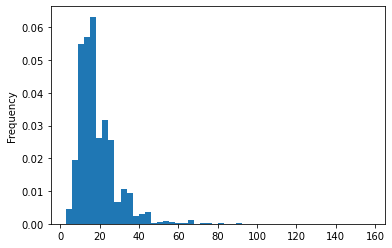

In [43]:
# Categorizing annual incode in bins 
#dfprocess['AnnualIncome']=dfprocess['AnnualIncome'].astype(object)
dfprocess['AnnualIncome'] = dfprocess['AnnualIncome']/10000 
print(dfprocess['AnnualIncome'].value_counts(bins=10,sort=False))
dfprocess['AnnualIncome'].plot(kind='hist',bins=50,density=True)

In [44]:
dfprocess1=dfprocess.copy()

Reference: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut

In [47]:
def createbins(dataframe, column_name, label_texts, option):
    # Create a new column to store the bin labels
    bin_column_name = column_name + '_bin'
    
    if option == 'quantile':
        dataframe[bin_column_name] = pd.qcut(dataframe[column_name], q=len(label_texts), labels=label_texts)
    elif option == 'equal-length':
        dataframe[bin_column_name] = pd.cut(dataframe[column_name], bins=len(label_texts), labels=label_texts)
    else:
        raise ValueError("Invalid option. Please choose either 'quantile' or 'equal-length'.")
    
    return dataframe


In [48]:
#option = 'quantile'  # or 'equal-length'
dfprocess1 = createbins(dfprocess1,'AnnualIncome', ["low","medium", "high"], 'quantile')

In [49]:
dfprocess1['AnnualIncome_bin'].value_counts()

low       14473
high      11282
medium    10702
Name: AnnualIncome_bin, dtype: int64

In [70]:
dfprocess1.head(2)

,ID,Gender,OwnCar,OwnReality,ChildCount,AnnualIncome,IncomeType,EducationType,FamilyStatus,HousingType,...,DaysEmployed,MobileFlag,WorkPhoneFlag,PhoneFlag,EmailFlag,OccupationType,FamilySize,begin_month,targetrisk,AnnualIncome_bin
0,5008804,1,1,1,0,42.75,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,0,high
1,5008805,1,1,1,0,42.75,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,0,high


In [71]:
dfprocess1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                36457 non-null  int64   
 1   Gender            36457 non-null  int64   
 2   OwnCar            36457 non-null  int64   
 3   OwnReality        36457 non-null  int64   
 4   ChildCount        36457 non-null  object  
 5   AnnualIncome      36457 non-null  float64 
 6   IncomeType        36457 non-null  object  
 7   EducationType     36457 non-null  object  
 8   FamilyStatus      36457 non-null  object  
 9   HousingType       36457 non-null  object  
 10  DaysBirth         36457 non-null  int64   
 11  DaysEmployed      36457 non-null  int64   
 12  MobileFlag        36457 non-null  int64   
 13  WorkPhoneFlag     36457 non-null  int64   
 14  PhoneFlag         36457 non-null  int64   
 15  EmailFlag         36457 non-null  int64   
 16  OccupationType    2513

# Modeling with Random Forest

In [65]:
!pip install imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [91]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline as pl

In [84]:
def return_categorical_col(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object' or df[col].dtype == 'category']
    return feats

# function to factorize categorical features
def factorize_categorical(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df

# function to create dummy variables of categorical features
def return_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df

def encode_categorical(df):
    df_cata = return_categorical_col(df)
    df  = return_dummies(df, df_cata)
    return factorize_categorical(df, df_cata)

In [73]:
df_training = dfprocess1.copy()

<AxesSubplot:title={'center':'Target Count'}, xlabel='targetrisk', ylabel='count'>

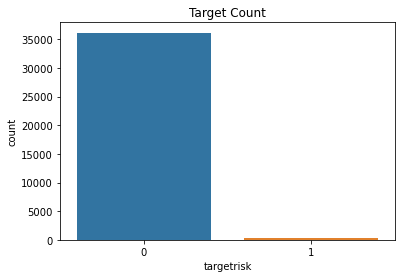

In [74]:
# Severe Unbalance for target variable
plt.title("Target Count")
sns.countplot(data = df_training, x = 'targetrisk')

C:\Users\anton\AppData\Local\Temp\ipykernel_34176\3253419197.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



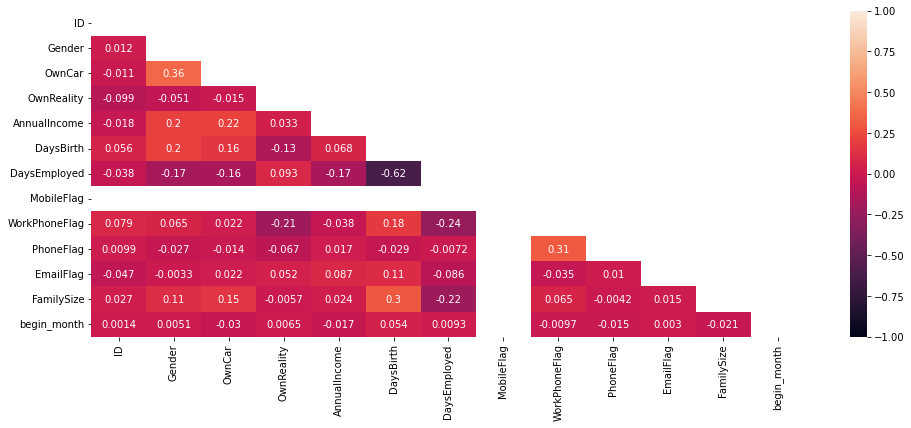

In [75]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_training.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_training.corr(), mask=mask, vmin=-1, vmax=1, annot=True)

In [85]:
#df_training['ChildCount'] = df_training['ChildCount'].astype('int')
df_training['targetrisk'] = df_training['targetrisk'].astype('int')
df_training_encode = encode_categorical(df_training)
df_training_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 66 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           36457 non-null  int64  
 1   Gender                                       36457 non-null  int64  
 2   OwnCar                                       36457 non-null  int64  
 3   OwnReality                                   36457 non-null  int64  
 4   ChildCount                                   36457 non-null  int64  
 5   AnnualIncome                                 36457 non-null  float64
 6   IncomeType                                   36457 non-null  int64  
 7   EducationType                                36457 non-null  int64  
 8   FamilyStatus                                 36457 non-null  int64  
 9   HousingType                                  36457 non-null  int64  
 10

In [87]:
y = df_training_encode['targetrisk']
X = df_training_encode.drop(['targetrisk', 'ID'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

In [103]:
#Combination of oversampling and undersampling
over_samp = SMOTE(sampling_strategy=0.3)
under_samp = RandomUnderSampler(sampling_strategy=0.5)
model = RandomForestClassifier()
steps = [('o', over_samp), ('u', under_samp), ('model', model)]
model_pipeline = Pipeline(steps = steps)

In [104]:
model_pipeline.get_params()

{'memory': None,
 'steps': [('o', SMOTE(sampling_strategy=0.3)),
  ('u', RandomUnderSampler(sampling_strategy=0.5)),
  ('model', RandomForestClassifier())],
 'verbose': False,
 'o': SMOTE(sampling_strategy=0.3),
 'u': RandomUnderSampler(sampling_strategy=0.5),
 'model': RandomForestClassifier(),
 'o__k_neighbors': 5,
 'o__n_jobs': None,
 'o__random_state': None,
 'o__sampling_strategy': 0.3,
 'u__random_state': None,
 'u__replacement': False,
 'u__sampling_strategy': 0.5,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'auto',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_st

In [105]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]       
param_dist = {'model__n_estimators': n_estimators, 'model__max_depth': max_depth, 'model__max_features': max_features, 'model__min_samples_split': min_samples_split, 'model__min_samples_leaf': min_samples_leaf, 'model__bootstrap': bootstrap}


rand_search = RandomizedSearchCV(model_pipeline, param_distributions=param_dist, n_iter=15, cv=5)
rand_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('o',
                                              SMOTE(sampling_strategy=0.3)),
                                             ('u',
                                              RandomUnderSampler(sampling_strategy=0.5)),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=15,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_depth': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100, 110, None],
                                        'model__max_features': ['auto', 'sqrt'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 1

In [106]:
best_rf = rand_search.best_estimator_

In [107]:
y_hat = best_rf.predict(X_train_scaled)
y_pred = best_rf.predict(X_test_scaled)

print("Train ROC-AUC:", metrics.roc_auc_score(y_train, y_hat))
print("Test ROC-AUC:", metrics.roc_auc_score(y_test, y_pred))

Train ROC-AUC: 0.8429894411747743
Test ROC-AUC: 0.542493645379236
